In [513]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [499]:
def f1(x):
    return np.sin(2*x) + np.cos(3*x)

In [500]:
def f2(x):
    return 10*(x**5) + 5*(x**4) + 2*(x**3) - 0.5*(x**2) + 3*x + 2

In [501]:
X = np.linspace(0, 5, 1000).reshape(-1, 1)
y = f1(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [502]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

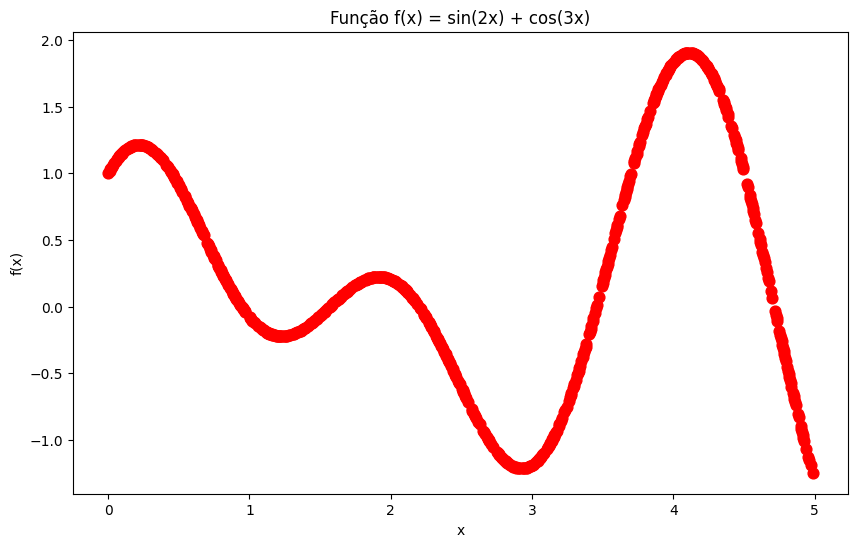

In [503]:
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='red', s=60)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função f(x) = sin(2x) + cos(3x)')
plt.show()

In [504]:
scaler_x = MinMaxScaler()
X_train = scaler_x.fit_transform(X_train)
X_val = scaler_x.transform(X_val)
X_test = scaler_x.transform(X_test)

In [505]:
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)
y_val   = scaler_y.transform(y_val)
y_test  = scaler_y.transform(y_test)

In [506]:
max_epochs = 3000
train_errors = []
val_errors = []

In [507]:
mlp = MLPRegressor(
    hidden_layer_sizes=(10,10,3),
    activation='tanh',
    max_iter = 1,
    warm_start=True,
    random_state = 42
)


In [508]:
for i in range(max_epochs):
    mlp.fit(X_train, y_train)

    y_train_pred = mlp.predict(X_train)
    y_val_pred = mlp.predict(X_val)
    y_test_pred = mlp.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))
    

c:\Users\eduar\Documents\Deep Learning\Perceptron\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduar\Documents\Deep Learning\Perceptron\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\eduar\Documents\Deep Learning\Perceptron\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduar\Documents\Deep Learning\Perceptron\.venv\Lib\site-packages\sklearn\neural_network\_multi

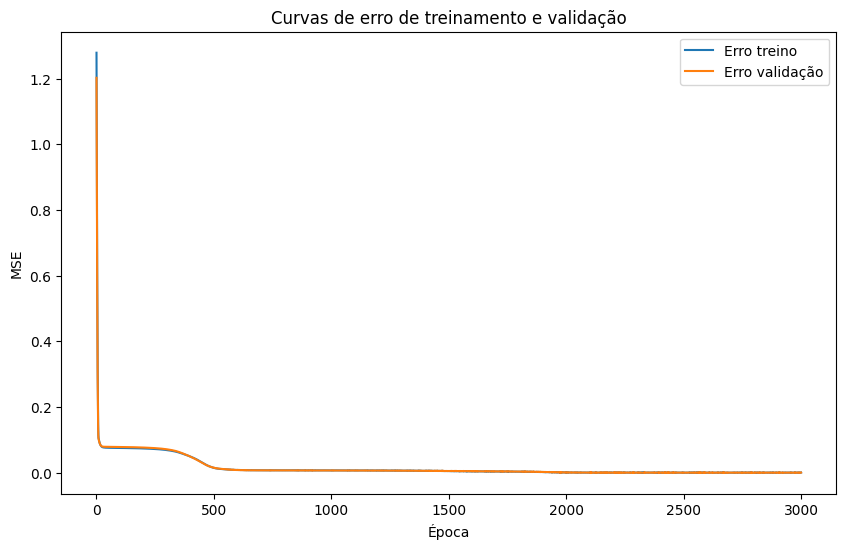

In [509]:
plt.figure(figsize=(10,6))
plt.plot(range(1, max_epochs+1), train_errors, label='Erro treino')
plt.plot(range(1, max_epochs+1), val_errors, label='Erro validação')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.title('Curvas de erro de treinamento e validação')
plt.legend()
plt.show()

In [510]:
y_test_real = scaler_y.inverse_transform(y_test)
y_test_pred_real = scaler_y.inverse_transform(y_test_pred.reshape(-1,1))

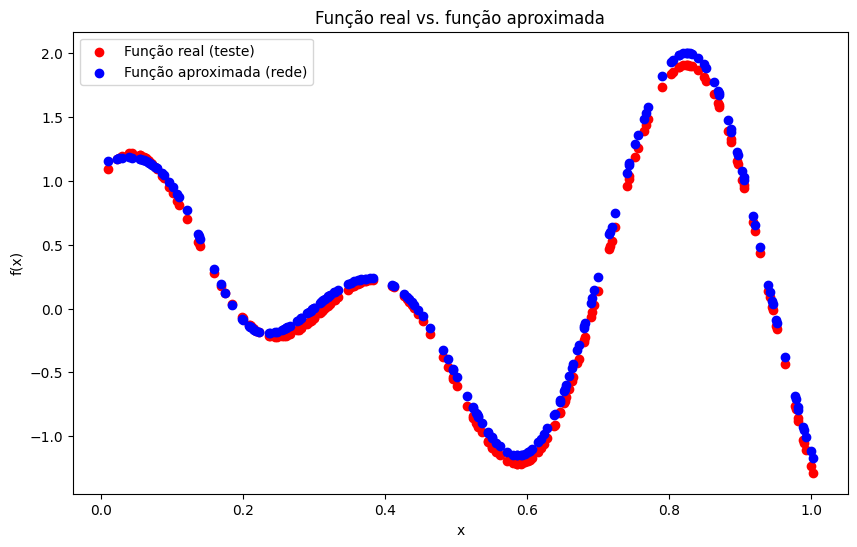

In [511]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test_real, color='red', label='Função real (teste)')
plt.scatter(X_test, y_test_pred_real, color='blue', label='Função aproximada (rede)')
plt.title('Função real vs. função aproximada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [512]:
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"MSE treino: {train_mse:.4f}")
print(f"MSE validação: {val_mse:.4f}")
print(f"MSE test: {test_mse:.4f}")

MSE treino: 0.0005
MSE validação: 0.0005
MSE test: 0.0005


In [514]:
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"R2 treino: {train_r2:.4f}")
print(f"R2 validação: {val_r2:.4f}")
print(f"R2 test: {test_r2:.4f}")

R2 treino: 0.9937
R2 validação: 0.9940
R2 test: 0.9938
